In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
dist = [np.random.normal(-10, 123, 10000), np.random.normal(0, 51, 10000), np.random.normal(20, 3, 10000)]
w = [0.2, 0.3, 0.5]
general = np.hstack([np.random.choice(dist[i], int(w[i] * 10000)) for i in range(3)])

In [3]:
def aprox_mean(samples, weights):
    return np.array([samples[i].mean() * weights[i] for i in range(3)]).sum()


def aprox_var(samples, weights, mean):
    return np.array([samples[i].var() * weights[i] for i in range(3)]).sum() + \
           np.array([(mean - samples[i].mean()) ** 2 * weights[i] for i in range(3)]).sum()


def proportional_model(dist, w, size):
    mean_dist = []
    var_dist = []
    for _ in range(1000):
        s = [np.random.choice(dist[i], int(w[i] * size)) for i in range(3)]
        mean = aprox_mean(s, w)
        var = aprox_var(s, w, mean)
        mean_dist.append(mean)
        var_dist.append(var)
    return np.array(mean_dist), np.array(var_dist)


def optimal_model(dist, w, size):
    mean_dist = []
    var_dist = []
    denum = np.array([dist[i].std() * w[i] for i in range(3)]).sum()
    opt = [dist[i].std() * w[i] / denum for i in range(3)]
    for i in range(1000):
        s = [np.random.choice(dist[i], int(opt[i] * size)) for i in range(3)]
        mean = aprox_mean(s, w)
        var = aprox_var(s, w, mean)
        mean_dist.append(mean)
        var_dist.append(var)
    return np.array(mean_dist), np.array(var_dist)

def random_model(general, size):
    mean_dist = []
    var_dist = []
    for _ in range(1000):
        sample = np.random.choice(general, size)
        mean = sample.mean()
        var = sample.var()
        mean_dist.append(mean)
        var_dist.append(var)
    return np.array(mean_dist), np.array(var_dist)

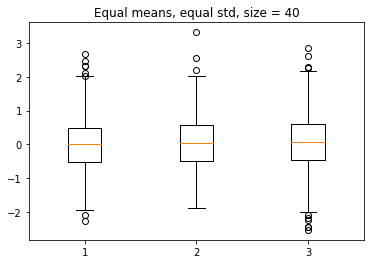

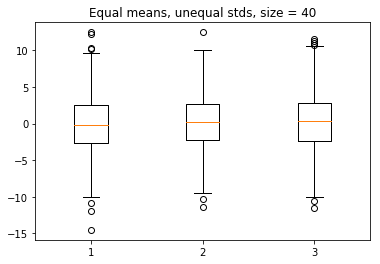

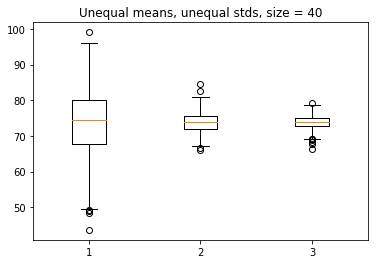

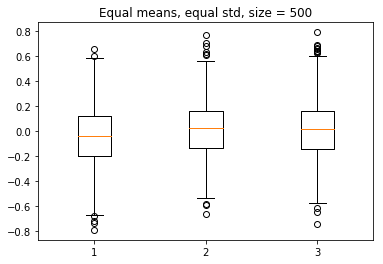

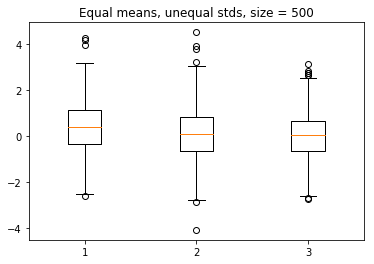

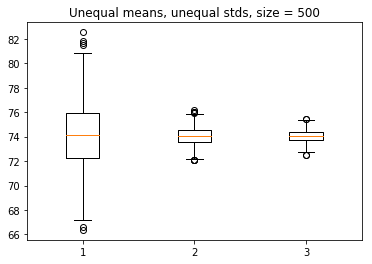

In [4]:
w = [0.2, 0.3, 0.5]

for size in [40, 500]:
    for means, stds in [([0, 0, 0], [5, 5, 5]), ([0, 0, 0], [13, 37, 18]), ([-15, 145, 67], [34, 12, 1])]:
        dist = [np.random.normal(means[i], stds[i], 10000) for i in range(3)]
        general = np.hstack([np.random.choice(dist[i], int(w[i] * 10000)) for i in range(3)])
        
        random_mean_dist, random_var_dist = random_model(general, size)
        prop_mean_dist, prop_var_dist = proportional_model(dist, w, size)
        opt_mean_dist, opt_var_dist = optimal_model(dist, w, size)
        
        p = plt.boxplot([random_mean_dist, prop_mean_dist, opt_mean_dist])
        if means[0] == means[1]:
            title = 'Equal means, '
        else:
            title = 'Unequal means, '
        if stds[0] == stds[1]:
            title += 'equal std, '
        else:
            title += 'unequal stds, '
        title += 'size = {}'.format(size)
        plt.title(title)
        plt.show()
        

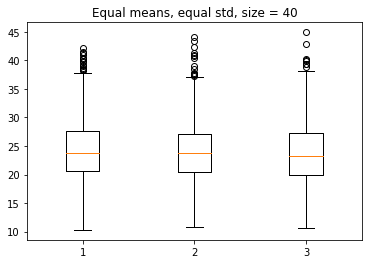

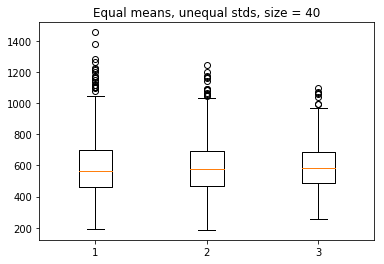

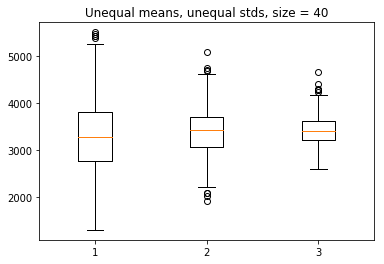

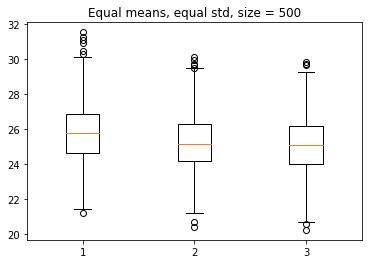

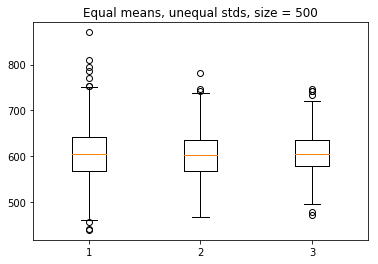

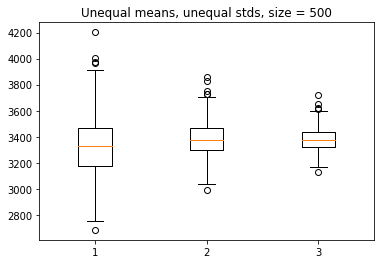

In [5]:
w = [0.2, 0.3, 0.5]

for size in [40, 500]:
    for means, stds in [([0, 0, 0], [5, 5, 5]), ([0, 0, 0], [13, 37, 18]), ([-15, 145, 67], [34, 12, 1])]:
        dist = [np.random.normal(means[i], stds[i], 10000) for i in range(3)]
        general = np.hstack([np.random.choice(dist[i], int(w[i] * 10000)) for i in range(3)])
        
        random_mean_dist, random_var_dist = random_model(general, size)
        prop_mean_dist, prop_var_dist = proportional_model(dist, w, size)
        opt_mean_dist, opt_var_dist = optimal_model(dist, w, size)
        
        p = plt.boxplot([random_var_dist, prop_var_dist, opt_var_dist])
        if means[0] == means[1]:
            title = 'Equal means, '
        else:
            title = 'Unequal means, '
        if stds[0] == stds[1]:
            title += 'equal std, '
        else:
            title += 'unequal stds, '
        title += 'size = {}'.format(size)
        plt.title(title)
        plt.show()
        

Проанализировав результаты, можно сделать вывод, что и пропорциональный, и оптимальный метод выбора подсэмплов не дают ощутимого преимущества в точности точечных оценок среднего и дисперсии генеральной совокупности в случае, когда средние и дисперсии составных распределений в смеси равны. 

В случае равных средних и различных дисперсий составных распределений пропорциональный и оптимальный метод дают чуть более точные результаты как для среднего, так и для дисперсии.

В случае различных средних и дисперсий пропорциональный метод дает ощутимо более точные оценки чем случайный, а оптимальный дает ощутимо более точные оценки, чем пропорциональный.